<a href="https://colab.research.google.com/github/OliwierStecyk/Real-estate-price-prediction-analysis/blob/main/UczenieNadzorowane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Pobranie i wczytanie danych – Boston Housing Dataset

**Informacja o danych**

Boston Housing Dataset to popularny zbiór danych stosowany w dziedzinie uczenia maszynowego do zadań regresji. Zbiór ten zawiera informacje na temat cen domów w różnych dzielnicach miasta Boston w latach 70-tych. Zbiór składa się z 506 rekordów i 13 atrybutów, w tym cechy takie jak średnia liczba pokoi, odległość od pięciu dużych centrów zatrudnienia czy wskaźnik przestępczości na mieszkańca. Zbiór ten pozwala na naukę różnych technik regresji, od prostych modeli liniowych po bardziej złożone modele bazujące na sieciach neuronowych czy algorytmach drzew decyzyjnych.

**Opis poszczególnych kolumn**

- crim: Per capita crime rate by town.
- zn: Proportion of residential land zoned for lots over 25,000 sq. ft.
- indus: Proportion of non-retail business acres per town.
- chas: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
- nox: Nitric oxide concentration (parts per 10 million).
- rm: Average number of rooms per dwelling.
- age: Proportion of owner-occupied units built before 1940.
- dis: Weighted distances to five Boston employment centers.
- rad: Index of accessibility to radial highways.
- tax: Full-value property tax rate per 10,000.
- ptratio: Pupil-teacher ratio by town.
- b: 1000(Bk - 0.63)^2, where Bk is the proportion of Black residents by town.
- lstat: Percentage of lower-status population.
- medv: Median value of owner-occupied homes in $1000s (target variable).

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"

columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

data = pd.read_csv(url, delim_whitespace=True, names=columns)

data.head(5)

/tmp/ipython-input-4156551686.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(url, delim_whitespace=True, names=columns)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# 2. Wykonanie EDA, sprawdzenie jego struktury, charakterystyki oraz sprawdzenie współliniowości zmiennych.

In [174]:
data.info()
print(f"Sprawdzenie Braków danych -> ")
print(data.isnull().sum())
print(data.describe())
print(data.shape)
print(f"Zduplikowanych rekordów {data.duplicated().sum()} ")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
Sprawdzenie Braków danych -> 
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
          

---
#  2.1 Podsumowanie

Zbiór danych składa się z 506 obserwacji oraz 14 zmiennych, z czego 12 ma charakter ciągły (float64), a 2 są zmiennymi dyskretnymi (int64). Wszystkie zmienne są kompletne — nie zauważyłem braków danych, czy zduplikowanych rekordów, co wyeliminowało wstępne czyszczenie zbioru

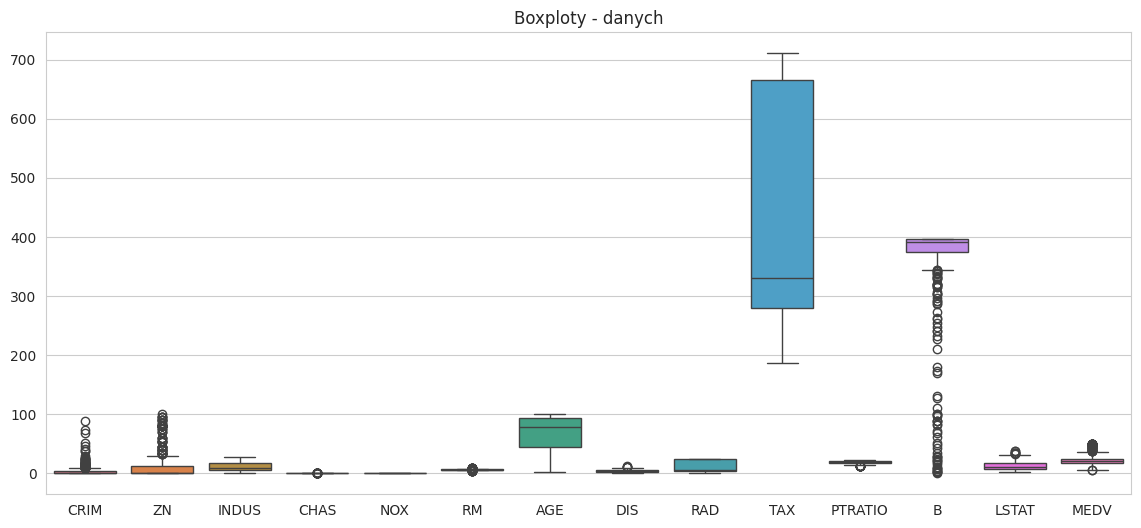

In [175]:
plt.figure(figsize=(14,6))
sns.boxplot(data=data)
plt.title("Boxploty - danych")
plt.show()

**Elementy boxplota:**

Pudełko (box)
- Zakres od Q1 (25 percentyl) do Q3 (75 percentyl) – czyli IQR

Linia w środku pudełka  
- Mediana (50 percentyl)

Wąsy sięgają do:
- dolnej granicy: Q1 − 1.5 × IQR
- górnej granicy: Q3 + 1.5 × IQR  

Kółka, kropki - outliery
Możemy zobaczyć zdecydowaną ilość ich w kolumnie B,MEDV,CRIM,ZN, natomiast sporadyczne CHAS, RM, DIS, PTRATIO, LSTAT

In [176]:
num_cols = data.columns

outliers_summary = []

for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col]

    outliers_summary.append({
        "column": col,
        "num_outliers": outliers.shape[0],
    })


outliers_df = pd.DataFrame(outliers_summary)
outliers_df

,column,num_outliers
0,CRIM,66
1,ZN,68
2,INDUS,0
3,CHAS,35
4,NOX,0
5,RM,30
6,AGE,0
7,DIS,5
8,RAD,0
9,TAX,0


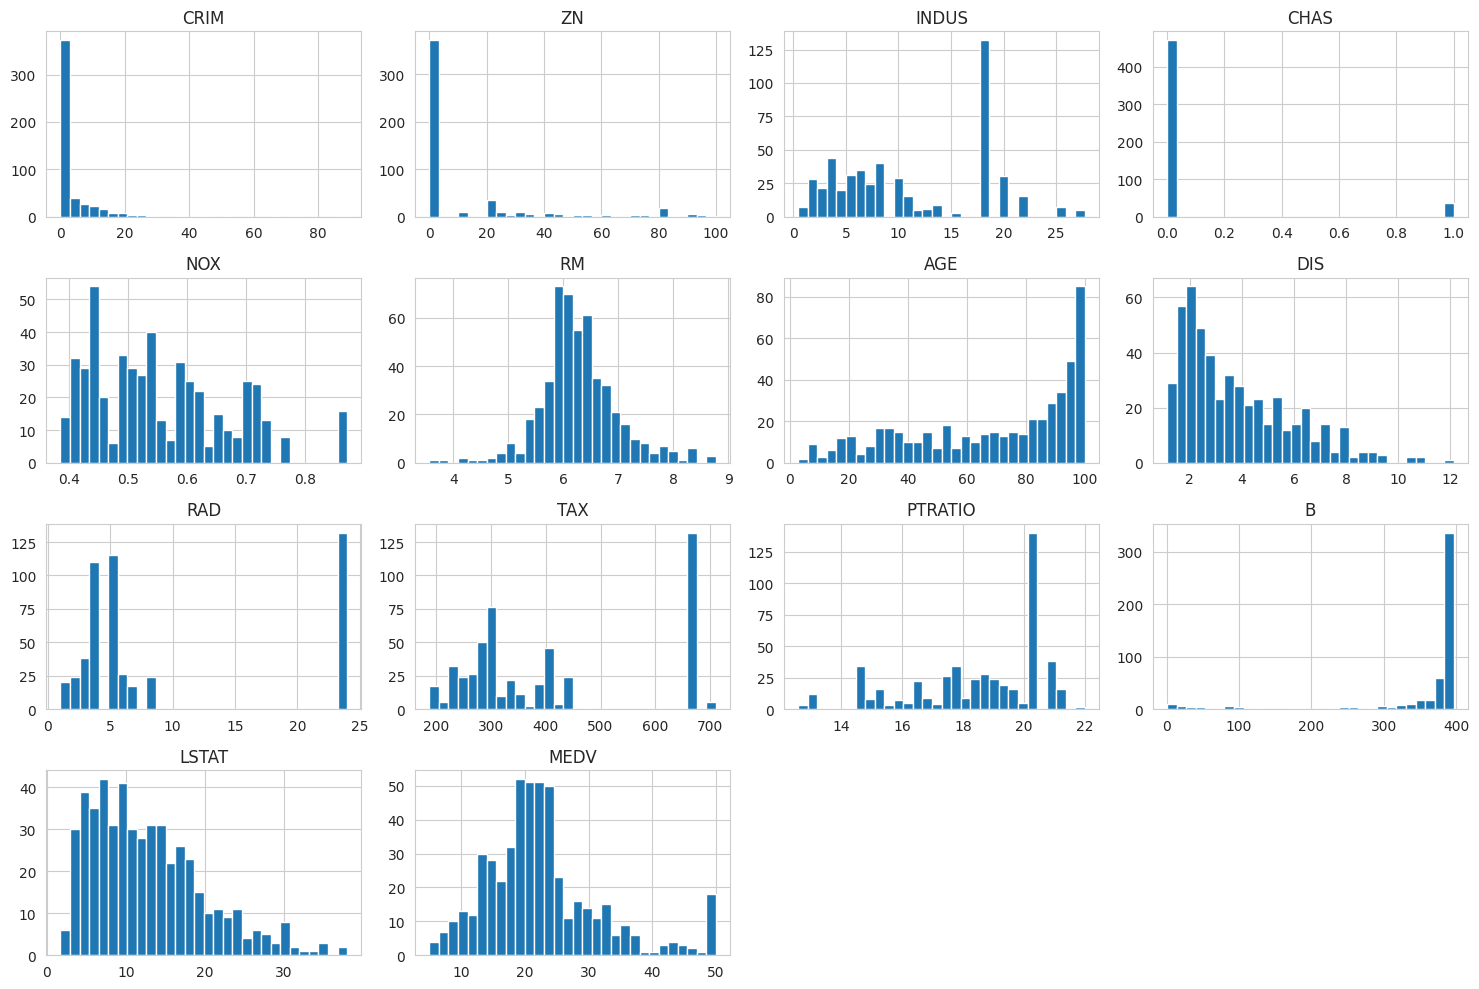

In [177]:
data.hist(bins=30, figsize=(15,10) )
plt.tight_layout()
plt.show()

---

# 2.2 Przegląd i wyjaśnienie widocznych rozkładów

- CCIM, DIS, LSTAT, ZN -> Rozkład Skośny Prawostronnie np CRIM większość dzielnic jest bezpieczna, ale kilka ma ekstremalną przestępczość
- AGE, B, PTRATIO -> Rozkład Skośny lewostronnie np. wykres AGE pokazuje, że w tym zbiorze większość budynków jest starych
- RAD, TAX, troszke INDUS -> rozkład Dwumodalny np w RAD widać grupę dzielnic z małym dostępem do autostrad i drugą, oddzielną grupę z bardzo dużym dostępem
- RM -> Rozkład Normalny symetria względem środka
- MEDV -> Troszkę rozkład normalny ale te wartośći na 50


---

# 2.3  Co to jest współliniowość zmiennych?

Współliniowość (Multicollinearity) występuje, gdy dwie lub więcej zmiennych niezależnych (cech, na podstawie których przewidujemy) jest ze sobą bardzo silnie skorelowanych. Używamy Macierzy korelacji współczynników korelacji Pearsona.

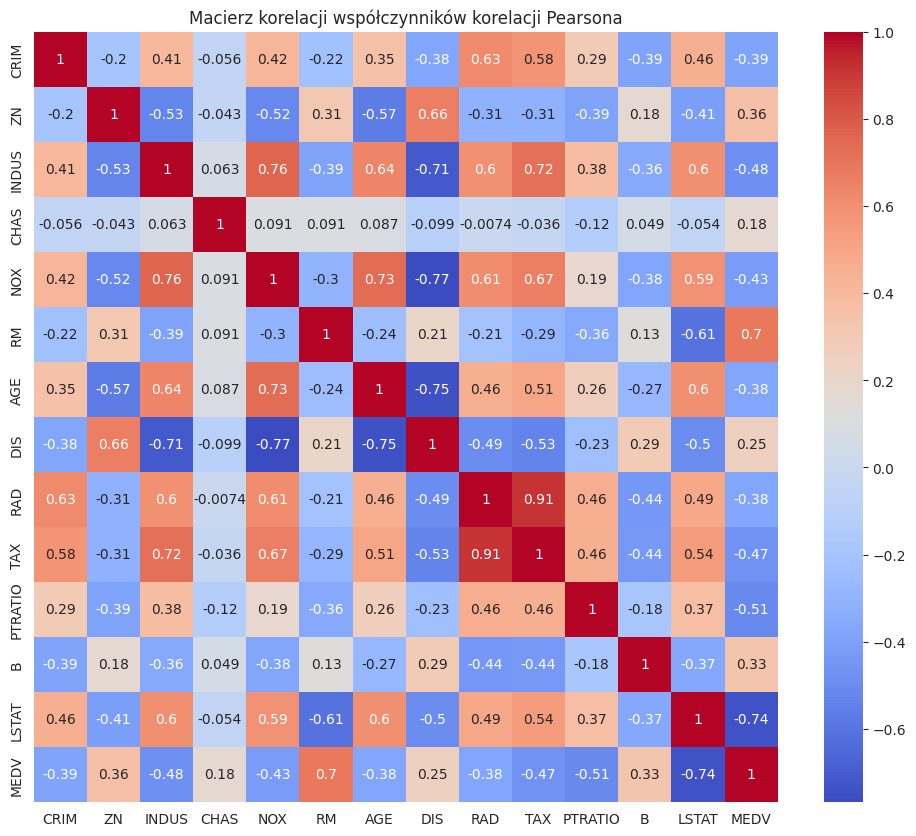

In [178]:
corr_matrix = data.corr()

plt.figure( figsize=(12,10) )
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Macierz korelacji współczynników korelacji Pearsona")
plt.show()


# 2.4 Macierz Korelacji Współczynników Korelacji Pearsona

**Macierz korelacji** to tabela, która pokazuje jak silnie każda zmienna jest powiązana z każdą inną zmienną. 1	idealna korelacja dodatnia -1	idealna korelacja ujemna
0	brak zależności liniowej  

Parametry do **sns.heatmap**  
`annot`
- True → w każdej komórce pojawi się wartość liczbowa  
- False → tylko kolory, bez liczb  

`cmap` - Mapa kolorów, najbardziej popularne:
- coolwarm
- "viridis"
- "RdBu"
- "YlGnBu"

Korelacja między TAX i RAD wynosi 0.91

Ze względu na ryzyko niestabilności modelu regresji, podjęto decyzję o usunięciu zmiennej RAD, ponieważ zmienna TAX wykazuje silniejszą korelację ze zmienną celową MEDV (-0.47 vs -0.38). Znaleziono również silne korelacje ujemne zmiennej DIS ze zmiennymi NOX i AGE, co sugeruje powiązania między lokalizacją, wiekiem budynków a zanieczyszczeniem."*



In [179]:
data_cleaned = data.copy()
data_cleaned = data_cleaned.drop('RAD', axis=1)

W celu dokładnej weryfikacji problemu współliniowości (multicollinearity), oprócz standardowej macierzy korelacji Pearsona, zastosowano analizę wskaźnika VIF (Variance Inflation Factor - Współczynnik Inflacji Wariancji). Jest to miara statystyczna, która ocenia, w jakim stopniu wariancja szacowanego współczynnika regresji jest zawyżona z powodu korelacji między zmiennymi predykcyjnymi  

Podczas gdy macierz korelacji (mapa ciepła) pozwala wykryć jedynie silne relacje między parami zmiennych (np. A vs B), wskaźnik VIF pozwala zidentyfikować sytuację, w której zmienna jest silnie skorelowana z kombinacją liniową pozostałych zmiennych (np. zmienna A jest zależna od sumy wpływów zmiennych B, C i D)

- VIF ≈ 1: Brak korelacji.  
- 1 < VIF < 5: Umiarkowana korelacja, akceptowalna w modelu.  
- VIF > 5: Wysoka korelacja, sugerująca potencjalne problemy.  
- VIF > 10: Krytyczna współliniowość, wymagająca usunięcia zmiennej z modelu  



In [180]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data_cleaned.select_dtypes(include=[np.number])

X_with_const = sm.add_constant(X)
vif_data = pd.DataFrame()

vif_data["Cecha"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(len(X_with_const.columns))]

vif_data = vif_data[vif_data["Cecha"] != "const"]
vif_data = vif_data[vif_data["Cecha"] != "MEDV"]
print(vif_data.sort_values(by="VIF", ascending=False))

      Cecha       VIF
5       NOX  4.441583
8       DIS  4.385150
3     INDUS  3.689281
12    LSTAT  3.531961
9       TAX  3.417498
7       AGE  3.083543
2        ZN  2.310513
6        RM  2.250604
10  PTRATIO  1.878937
1      CRIM  1.679218
11        B  1.367247
4      CHAS  1.088901


# 3. Podział zbioru danych na zbiór treningowy i testowy

In [181]:
from sklearn.model_selection import train_test_split

X = data_cleaned.drop('MEDV', axis = 1 )
y = data_cleaned['MEDV']

X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42 )


print(f"Rozmiar X_train: {X_train.shape}")
print(f"Rozmiar X_test:  {X_test.shape}")
print(f"Rozmiar y_train: {y_train.shape}")
print(f"Rozmiar y_test:  {y_test.shape}")



Rozmiar X_train: (404, 12)
Rozmiar X_test:  (102, 12)
Rozmiar y_train: (404,)
Rozmiar y_test:  (102,)


# 2.5 Zlogarytmizowanie danych

Mamy bardzo dużo wykresów prawoskośnych dlatego  zastosuje dla CRIM LSTAT DIS I ZN. Użyje np.log1p aby uniknąć log(0) nieskończoność  

In [182]:

X_train_log = X_train.copy()
X_test_log = X_test.copy()

features_to_log = ['CRIM', 'LSTAT', 'DIS', 'ZN']

for col in features_to_log:
    X_train_log[col] = np.log1p(X_train[col])
    X_test_log[col] = np.log1p(X_test[col])

y_train_log = np.log1p(y_train)


# 4. Zbadanie różnych modeli takich jak regresja liniowa i XGBoost

In [183]:
# Regresja liniowa
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit( X_train, y_train )

## XGBoost
import xgboost as xgb

xg_reg = xgb.XGBRegressor( objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10 )
xg_reg_log = xgb.XGBRegressor( objective = 'reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10 )

xg_reg.fit( X_train, y_train )


XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=10,
             n_jobs=None, ...)

# 4.1 Czym jest XGBoost? (Teoria do raportu)
XGBoost (skrót od eXtreme Gradient Boosting) to algorytm oparty na drzewach decyzyjnych (takich schematach "jeśli X > 5 to idź w lewo, jeśli nie to w prawo").

Wyjaśnienie parametrów :  
`objective = 'reg:squarederror'`  
- Co to jest: Funkcja celu (funkcja straty).  
- Wyjaśnienie: Mówisz modelowi, co ma minimalizować. Ponieważ robisz regresję (przewidujesz konkretną liczbę, np. cenę, temperaturę), używasz błędu kwadratowego (MSE - Mean Squared Error). Model będzie starał się tak dopasować wagi, aby kwadrat różnicy między predykcją a rzeczywistością był jak najmniejszy.  
`colsample_bytree = 0.3`  
- Co to jest: Losowanie cech (kolumn).  
- Wyjaśnienie: Przy budowaniu każdego pojedynczego drzewa, algorytm nie bierze pod uwagę wszystkich Twoich kolumn (zmiennych w X_train), ale losuje tylko 30% z nich (0.3).  
- Po co: To zapobiega sytuacji, w której jedna bardzo silna cecha dominuje cały model. Zmusza model do szukania zależności w innych, mniej oczywistych zmiennych. To technika walcząca z przeuczeniem.   
`learning_rate = 0.1 (często oznaczane jako eta)`  
- Co to jest: Współczynnik uczenia.  
- Wyjaśnienie: Określa, jak duży wpływ na wynik końcowy ma każde nowe drzewo.   Wartość 0.1 oznacza, że każde nowe drzewo koryguje błędy "ostrożnie".
- Analogia: Wyobraź sobie, że idziesz w dół góry we mgle. Learning rate to długość Twojego kroku.  
Duży krok (np. 1.0) = szybko dojdziesz, ale możesz przeskoczyć dołek.  
Mały krok (np. 0.01) = będziesz szedł bardzo długo, ale precyzyjnie trafisz w dno.  
0.1 to standardowa, umiarkowana wartość.  
`max_depth = 5`  
- Co to jest: Maksymalna głębokość drzewa.  
- Wyjaśnienie: Każde drzewo może zadać maksymalnie 5 pytań (warunków) w głąb.  
- Po co: Płytkie drzewa (np. 3-6) są lepsze, bo nie zapamiętują danych na pamięć. Zbyt głębokie drzewa (np. 20) idealnie dopasują się do danych treningowych, ale polegną na nowych danych (przeuczenie).  
`alpha = 10`  
- Co to jest: Regularyzacja L1 (Lasso).  
- Wyjaśnienie: To matematyczny "bat" na model. Dodaje karę za posiadanie zbyt skomplikowanych wag.  
- Po co: Wartość 10 jest dość wysoka, co sugeruje, że chcesz mocno uprościć model i odrzucić szum informacyjny. Pomaga to, gdy masz dużo zmiennych, które mogą być mało istotne.  
`n_estimators = 10`  
- Co to jest: Liczba drzew.  
- Wyjaśnienie: Model zbuduje dokładnie 10 drzew korygujących błędy.  


# 5. Zastosowanie GridSearchCV, aby dobrać optymalne hiperparametry dla modelu XGBoost. Możesz użyć różnych metryk ewaluacyjnych, takich jak MSE, RMSE, MAE, R2.



In [184]:
from sklearn.model_selection import GridSearchCV

params = { 'learning_rate': [ 0.01 , 0.1 , 0.3 ], 'max_depth': [ 3, 5, 7 ], 'n_estimators' : [ 50, 10, 200 ]}
xg_reg = xgb.XGBRegressor( objective = 'reg:squarederror', colsample_bytree = 0.3 )
grid = GridSearchCV( estimator = xg_reg, param_grid = params, cv = 5, scoring = 'neg_mean_squared_error' )
grid.fit( X_train, y_train )

print("Best score: %f using params: %s" % ( grid.best_score_, grid.best_params_))

Best score: -13.813280 using params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [185]:
lr_log = LinearRegression()
lr_log.fit(X_train_log, y_train_log)
y_pred_lr_log_scale = lr_log.predict(X_test_log)
y_pred_lr_back = np.expm1(y_pred_lr_log_scale)

grid_log = GridSearchCV(estimator=xg_reg_log, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_log.fit(X_train_log, y_train_log) # Trenujemy na logach!
print(f"Best params (Log): {grid_log.best_params_}")
y_pred_xg_log_scale = grid_log.predict(X_test_log)
y_pred_xg_log_back = np.expm1(y_pred_xg_log_scale) ## log1p

Best params (Log): {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}


In [186]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_lr = lr.predict( X_test )
y_pred_xg = grid.predict(X_test)



def print_metrics(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print(f"MSE:  {mean_squared_error(y_true, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"MAE:  {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"R2:   {r2_score(y_true, y_pred):.4f}")
    print("-" * 30)

print_metrics(y_test, y_pred_lr, "Linear Regression (Original)")
print_metrics(y_test, y_pred_xg, "XGBoost (Original)")
print_metrics(y_test, y_pred_lr_back, "Linear Regression (Log Transformed)")
print_metrics(y_test, y_pred_xg_log_back, "XGBoost (Log Transformed)")

--- Linear Regression (Original) ---
MSE:  26.47
RMSE: 5.14
MAE:  3.36
R2:   0.6390
------------------------------
--- XGBoost (Original) ---
MSE:  9.50
RMSE: 3.08
MAE:  2.03
R2:   0.8705
------------------------------
--- Linear Regression (Log Transformed) ---
MSE:  19.46
RMSE: 4.41
MAE:  2.66
R2:   0.7346
------------------------------
--- XGBoost (Log Transformed) ---
MSE:  24.99
RMSE: 5.00
MAE:  2.99
R2:   0.6592
------------------------------


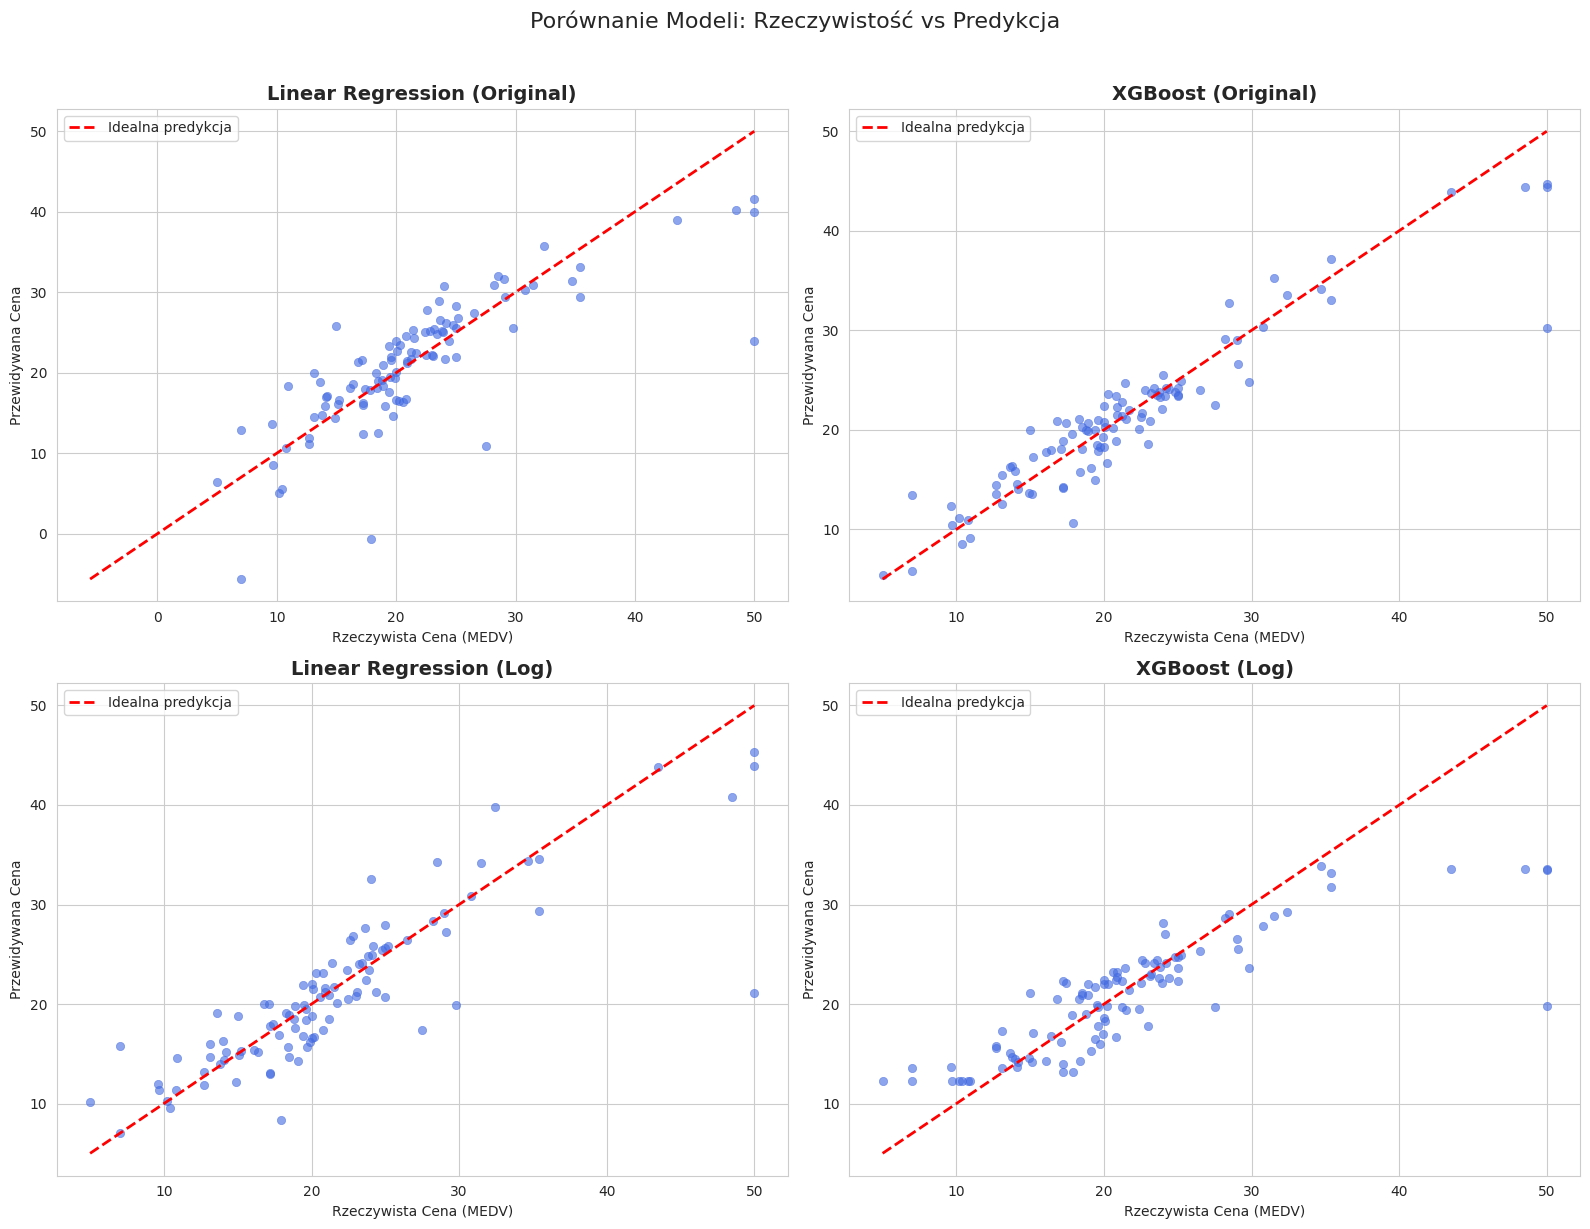

In [187]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 12))

models = [
    ('Linear Regression (Original)', y_pred_lr),
    ('XGBoost (Original)', y_pred_xg),
    ('Linear Regression (Log)', y_pred_lr_back),
    ('XGBoost (Log)', y_pred_xg_log_back)
]

for i, (name, y_pred) in enumerate(models, 1):
    plt.subplot(2, 2, i)


    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, edgecolor=None, color='royalblue')


    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', lw=2, label='Idealna predykcja')

    plt.title(f'{name}', fontsize=14, fontweight='bold')
    plt.xlabel('Rzeczywista Cena (MEDV)', fontsize=10)
    plt.ylabel('Przewidywana Cena', fontsize=10)
    plt.legend()

plt.suptitle('Porównanie Modeli: Rzeczywistość vs Predykcja', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

/tmp/ipython-input-4232379073.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='R2 Score', data=df_metrics, palette='viridis')


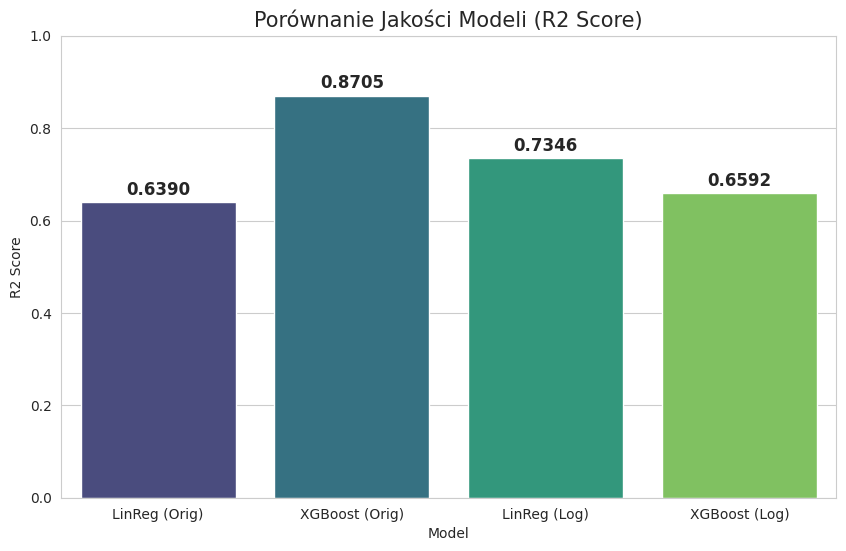

In [188]:
metrics_data = {
    'Model': ['LinReg (Orig)', 'XGBoost (Orig)', 'LinReg (Log)', 'XGBoost (Log)'],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_xg),
        r2_score(y_test, y_pred_lr_back),
        r2_score(y_test, y_pred_xg_log_back)
    ]
}

df_metrics = pd.DataFrame(metrics_data)


plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='R2 Score', data=df_metrics, palette='viridis')


for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=12, fontweight='bold')

plt.title('Porównanie Jakości Modeli (R2 Score)', fontsize=15)
plt.ylim(0, 1)
plt.show()

/tmp/ipython-input-4014550532.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_importances, palette='magma')


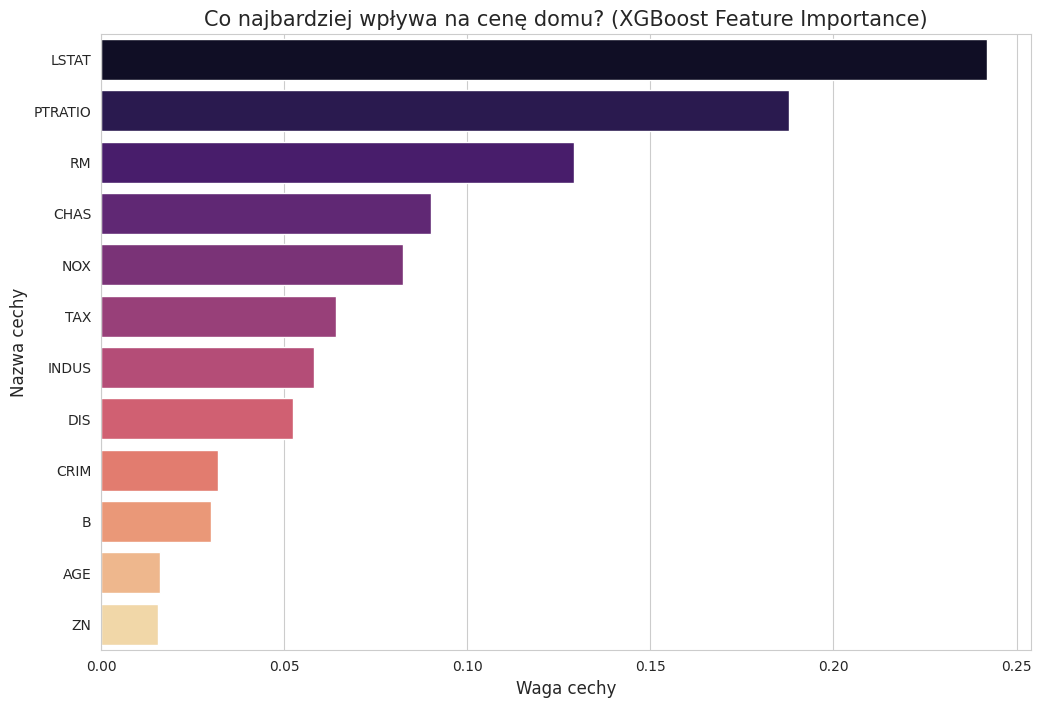

In [189]:
best_xgb = grid.best_estimator_

importances = best_xgb.feature_importances_
feature_names = X_train.columns

df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=df_importances, palette='magma')
plt.title('Co najbardziej wpływa na cenę domu? (XGBoost Feature Importance)', fontsize=15)
plt.xlabel('Waga cechy', fontsize=12)
plt.ylabel('Nazwa cechy', fontsize=12)
plt.show()

# 6 Założenia dla regresji liniowej

*Założenia :*

`Liniowość (Linearity):` Zależność między X a y musi być liniowa.  
`Normalność reszt (Normality of Residuals):` Błędy (różnice między prawdą a predykcją) powinny układać się w kształt dzwonu (rozkład normalny).  
`Homoskedastyczność (Homoscedasticity):` Stała wariancja błędów. Oznacza to, że model nie powinien mylić się bardziej dla drogich domów niż dla tanich (błąd powinien być losowy, a nie rosnąć w "lejek").  
`Brak Multikolinearności (No Multicollinearity):` Zmienne objaśniające (X) nie mogą być ze sobą zbyt mocno skorelowane (np. zmienna "Cena w PLN" i "Cena w EUR" to duplikat informacyjny).  

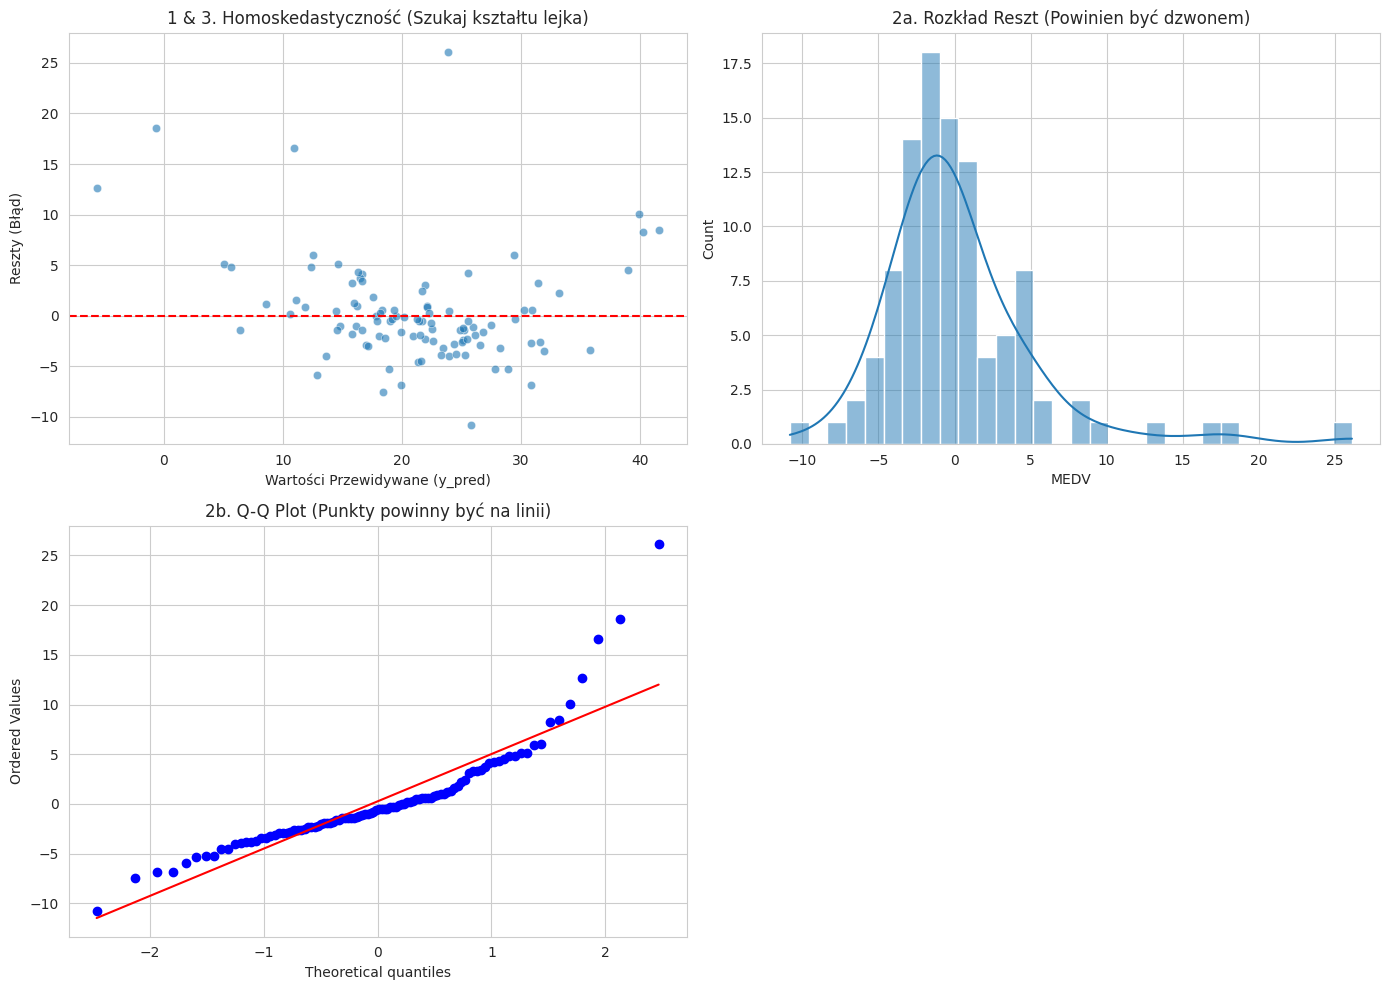


=== Sprawdzanie Multikolinearności (VIF) ===

=== Poprawne wyniki VIF ===
      Cecha       VIF
5       NOX  4.304929
8       DIS  3.954951
3     INDUS  3.682265
9       TAX  3.415289
7       AGE  3.083009
12    LSTAT  2.937752
2        ZN  2.273018
6        RM  1.885425
10  PTRATIO  1.734873
1      CRIM  1.664471
11        B  1.341459
4      CHAS  1.061561


In [190]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

residuals = y_test - y_pred_lr

plt.figure(figsize=(14, 10))

# --- ZAŁOŻENIE 1 i 3: Liniowość i Homoskedastyczność ---
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_pred_lr, y=residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Wartości Przewidywane (y_pred)')
plt.ylabel('Reszty (Błąd)')
plt.title('1 & 3. Homoskedastyczność (Szukaj kształtu lejka)')

# --- ZAŁOŻENIE 2: Normalność Reszt (Histogram) ---
plt.subplot(2, 2, 2)
sns.histplot(residuals, kde=True, bins=30)
plt.title('2a. Rozkład Reszt (Powinien być dzwonem)')

# --- ZAŁOŻENIE 2: Normalność Reszt (Q-Q Plot) ---
plt.subplot(2, 2, 3)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('2b. Q-Q Plot (Punkty powinny być na linii)')

plt.tight_layout()
plt.show()


print("\n=== Sprawdzanie Multikolinearności (VIF) ===")
X_features = data_cleaned.drop(columns=['MEDV'])
X = X_features.select_dtypes(include=[np.number])

X_with_const = sm.add_constant(X)


vif_data = pd.DataFrame()
vif_data["Cecha"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i)
                   for i in range(len(X_with_const.columns))]

vif_data = vif_data[vif_data["Cecha"] != "const"]

print("\n=== Poprawne wyniki VIF ===")
print(vif_data.sort_values(by="VIF", ascending=False))

Na podstawie przeprowadzonej analizy reszt oraz wskaźnika VIF, zweryfikowano założenia metody Najmniejszych Kwadratów (OLS) dla modelu bazowego:   
**1. Liniowość (Linearity) – CZĘŚCIOWO SPEŁNIONE / NARUSZONE**  
Analiza: Wykres rozrzutu reszt względem wartości przewidywanych nie wykazuje silnego wzorca nieliniowego (np. paraboli), jednak widoczne są nieregularności dla wyższych wartości cenowych.  
Wniosek: Model liniowy ma trudności z dokładnym odwzorowaniem dynamiki cen w całym zakresie, co sugeruje, że relacja między cechami a ceną ma charakter nieliniowy (co potwierdziła poprawa wyników po transformacji logarytmicznej).     
**2. Normalność Reszt (Normality of Residuals) – NARUSZONE**   
Analiza: Histogram: Rozkład przypomina krzywą dzwonową, ale posiada wyraźną asymetrię prawostronną (długi ogon z prawej strony).  
Wykres Q-Q Plot: Punkty w środkowej części wykresu leżą na czerwonej linii, ale skrajne wartości (prawy górny róg) drastycznie od niej odbiegają.
Wniosek: Reszty nie mają idealnego rozkładu normalnego. Model systematycznie niedoszacowuje wartości najdroższych nieruchomości, generując duże błędy (outliery), co jest typowe dla zbioru Boston Housing (problem "uciętych" danych przy wartości 50.0).    
**3. Homoskedastyczność (Homoscedasticity) – NARUSZONE**  
Analiza: Na wykresie reszt wariancja błędu nie jest stała. Widoczne są pojedyncze, bardzo duże błędy (reszty > 20) występujące losowo, a nie jednorodna chmura punktów.  
Wniosek: Występuje problem heteroskedastyczności – model jest znacznie mniej stabilny dla pewnych grup obserwacji (szczególnie tych o nietypowo wysokich cenach).     
**4. Brak Multikolinearności (No Multicollinearity) – SPEŁNIONE**     
Analiza: Wszystkie zmienne objaśniające posiadają wskaźnik VIF (Variance Inflation Factor) poniżej 5. Najwyższa wartość to NOX (4.30), co jest bezpiecznym poziomem.   
Wniosek: Zmienne w modelu nie są ze sobą nadmiernie skorelowane, więc estymacja współczynników regresji jest stabilna technicznie.      
`Wnioski końcowe`   
Mimo braku problemu z multikolinearnością, Regresja Liniowa nie jest optymalnym modelem dla tego zbioru danych, ponieważ naruszone są kluczowe założenia o normalności reszt i homoskedastyczności. Obecność wartości odstających (outlierów) oraz nieliniowe zależności sprawiają, że modele oparte na drzewach decyzyjnych (jak XGBoost, który osiągnął R2 = 0.87) radzą sobie znacznie lepiej, gdyż nie wymagają spełnienia powyższych założeń.